# Random Forest Classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Importing Datasets (Tomek links, SMOTETOMEK, SMOTEENN)

In [3]:
tomek_data = pd.read_csv("Data/tomek_data.csv", index_col = 0)
tomek_data.head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,No of Days of Poor Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,3,0,1.70,120.0,42.0,1.0,5,4,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
1,4,1,1.91,75.0,21.0,4.0,5,4,2.0,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.0,1
2,4,1,1.78,84.0,27.0,1.0,5,4,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.0,1
3,6,0,1.55,68.0,28.0,1.0,1,2,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0,0.0,1
4,4,0,1.68,98.0,35.0,1.0,5,4,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1,0.0,0


In [4]:
tomek_data.describe()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,No of Days of Poor Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
count,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,...,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000,262224.000000
mean,4.299385,0.459782,1.702116,81.306440,27.934930,2.255644,3.873025,3.031076,2.390304,3.384629,...,0.031683,0.173115,0.027137,0.087463,0.305632,1.413238,0.608342,0.784333,0.022957,0.927207
std,1.570494,0.498381,0.105820,20.025933,6.029273,1.662712,1.399010,0.942280,1.023005,7.840640,...,0.175155,0.378348,0.162483,0.282513,0.460675,0.847308,0.488122,0.411285,0.149794,0.259796
min,1.000000,0.000000,0.910000,25.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.630000,68.000000,24.000000,1.000000,3.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,5.000000,0.000000,1.700000,79.000000,27.000000,1.000000,5.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,6.000000,1.000000,1.780000,91.000000,31.000000,3.000000,5.000000,4.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,1.000000,2.360000,294.000000,100.000000,6.000000,5.000000,4.000000,5.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000


In [5]:
SMOTETOMEK_data = pd.read_csv("Data/smotetomek_data.csv", index_col = 0)
SMOTETOMEK_data.head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,No of Days of Poor Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,3,0,1.70,120.0,42.0,1.0,5,4,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
1,4,1,1.91,75.0,21.0,4.0,5,4,2.0,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.0,1
2,4,1,1.78,84.0,27.0,1.0,5,4,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.0,1
3,6,0,1.55,68.0,28.0,1.0,1,2,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0,0.0,1
4,4,0,1.68,98.0,35.0,1.0,5,4,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1,0.0,0


In [6]:
SMOTETOMEK_data.describe()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,No of Days of Poor Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
count,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,...,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000,492612.000000
mean,4.760832,0.478354,1.704941,82.316917,28.179894,2.135973,3.550281,2.809599,2.753894,5.415895,...,0.075688,0.194281,0.050161,0.121922,0.426465,1.286195,0.674049,0.663110,0.028253,0.919728
std,1.404161,0.499532,0.103971,20.204855,6.026107,1.468328,1.480125,0.969114,1.079938,9.906678,...,0.234282,0.373199,0.193514,0.298628,0.466320,0.702737,0.442554,0.472647,0.150109,0.271714
min,1.000000,0.000000,0.910000,25.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.630000,68.000000,24.000000,1.000000,2.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,0.000000,1.700000,80.000000,27.000000,1.335301,4.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.048292,1.000000,1.000000,1.000000,0.000000,1.000000
75%,6.000000,1.000000,1.780000,93.000000,31.000000,3.000000,5.000000,4.000000,3.372353,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,1.000000,2.360000,294.000000,100.000000,6.000000,5.000000,4.000000,5.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000


In [4]:
SMOTEENN_data = pd.read_csv("Data/smoteenn_data.csv", index_col = 0)
SMOTEENN_data.head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,No of Days of Poor Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,3,0,1.70,120.0,42.0,1.0,5,4,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
1,4,1,1.78,84.0,27.0,1.0,5,4,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.0,1
2,4,0,1.68,98.0,35.0,1.0,5,4,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1,0.0,0
3,3,0,1.68,77.0,27.0,1.0,5,3,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
4,6,0,1.63,91.0,34.0,1.0,5,3,3.0,3.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0.0,1


In [5]:
SMOTEENN_data.describe()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,No of Days of Poor Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
count,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,...,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000,447686.000000
mean,4.733467,0.478929,1.705502,82.106334,28.088913,2.125766,3.577851,2.813825,2.725452,5.119788,...,0.077842,0.187389,0.050466,0.120088,0.418220,1.287439,0.673296,0.663219,0.027510,0.918541
std,1.421052,0.499556,0.103450,19.889789,5.904522,1.468661,1.476018,0.969700,1.079683,9.704763,...,0.234988,0.365122,0.191604,0.293283,0.462048,0.703169,0.440180,0.472610,0.146093,0.273539
min,1.000000,0.000000,0.910000,25.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.630000,68.000000,24.000000,1.000000,2.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.013751,0.000000,0.000000,1.000000
50%,5.000000,0.000000,1.700000,79.261318,27.000000,1.281429,4.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.042569,1.000000,1.000000,1.000000,0.000000,1.000000
75%,6.000000,1.000000,1.780000,93.000000,31.000000,3.000000,5.000000,4.000000,3.301552,4.048884,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,1.000000,2.360000,294.000000,100.000000,6.000000,5.000000,4.000000,5.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000


## Fitting model with tomek_data

In [4]:
y_train = SMOTEENN_data['Coronary Heart Disease/Myocardial Infarction']
x_train = SMOTEENN_data.drop('Coronary Heart Disease/Myocardial Infarction', axis = 1)

In [5]:
rdforest = RandomForestClassifier(max_depth = 6, random_state = 516)
rdforest.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, random_state=516)

In [7]:
pred_train = rdforest.predict(x_train)

In [15]:
rdforest.score(x_train, y_train)

0.8728506140464523

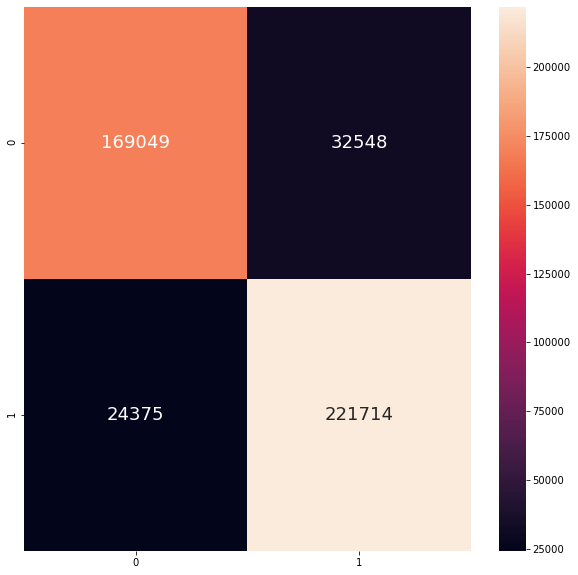

In [13]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(confusion_matrix(y_train, pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
rdforest = RandomForestClassifier(max_depth = 6, random_state = 516)
rdforest.fit(x_train, y_train)

In [ ]:
pred_train = rdforest.predict(x_train)